In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [4]:
data.shape

(1000, 2)

In [5]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [6]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [8]:
import nltk
import re
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [9]:
corpus = []
for i in range(0,1000):
    review = re.sub(pattern='[^a-zA-z]',repl=' ', string=data['Review'][i])
    
    
    review = review.lower()
    
    
    review_words = review.split()
    
    
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
    
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]
    
    review = ''.join(review)
    
    corpus.append(review)

In [10]:
corpus[:1500]

['wowloveplace',
 'crustgood',
 'tastitexturnasti',
 'stoplatemaybankholidayricksteverecommendlove',
 'selectmenugreatprice',
 'getangriwantdamnpho',
 'honesltitastfresh',
 'potatolikerubbercouldtellmadeaheadtimekeptwarmer',
 'frigreat',
 'greattouch',
 'servicprompt',
 'wouldgoback',
 'cashiercareeversaystillendwayyyoverpr',
 'tricapecodravolichickencranberrimmmm',
 'disgustprettisurehumanhair',
 'shocksignindiccash',
 'highlirecommend',
 'waitresslittlslowservic',
 'placeworthtimeletalonvega',
 'like',
 'burrittoblah',
 'foodamaz',
 'servicalsocute',
 'couldcarelessinteriorbeauti',
 'perform',
 'rightredvelvetcakeohhhstuffgood',
 'neverbroughtsaladask',
 'holewallgreatmexicanstreettacofriendlistaff',
 'tookhourgetfoodtablrestaurfoodlukewarmseverrunaroundliketotaloverwhelm',
 'worstsalmonsashimi',
 'alsocombolikeburgerfribeerdecentdeal',
 'likefinalblow',
 'foundplaceaccidcouldhappier',
 'seemlikegoodquickplacegrabbitefamiliarpubfoodfavorlookelsewher',
 'overallikeplacelot',
 'redeemq

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=data.iloc[:,1].values

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=786110)


In [92]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 979), (200, 979), (800,), (200,))

In [93]:
from sklearn.naive_bayes import MultinomialNB
Classif = MultinomialNB()
Classif = Classif.fit(X_train,y_train)

In [97]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)

In [102]:
cm_dt = [[ 98, 4],
       [ 1, 97]]

In [98]:
y_pred = dt.predict(X_test)

In [99]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)

print("------Scores------")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}%".format(round(score2*100,2)))
print("Recall score is: {}%".format(round(score3*100,2)))

------Scores------
Accuracy score is: 50.5%
Precision score is: 49.74%
Recall score is: 98.98%


In [100]:
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred)
cm_dt

array([[ 4, 98],
       [ 1, 97]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual values')

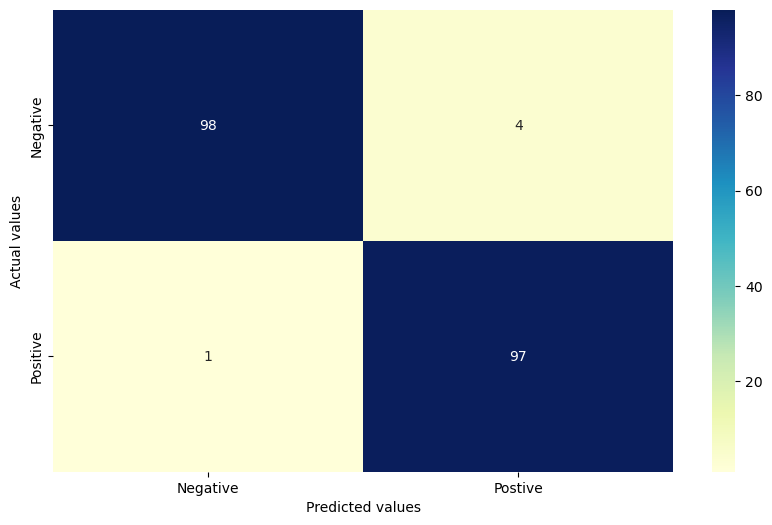

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm_dt,annot=True,cmap="YlGnBu", xticklabels=['Negative','Postive'],yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [104]:
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-z]',repl=' ',string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words =sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)
    
    temp = cv.transform([final_review]).toarray()
    return dt.predict(temp)

In [113]:
sample_review = 'The food was really bad.'

if predict_sentiment(sample_review):
    print("This is a Positive review.")
else:
    print("This is a Negative review. ")

This is a Positive review.


In [106]:
sample_review = 'The food was great.'

if predict_sentiment(sample_review):
    print("This is a Positive review.")
else:
    print("This is a Negative review. ")

This is a Positive review.
